# Plotting High Resolution Data
This notebook covers how to plot high resolution data onto the Earth.
* Downloading an example .nc file from Gadi of global temperature.
* Adding a colour scheme.
* Plotting on the surface of the Earth.

If you are running on Gadi/NCI, you should include gdata/fs38 in the storage. Otherwise it will download a ~0.5GB .nc file.

## Initial Setup

In [2]:
import accessvis
import xarray as xr
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import os
accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…


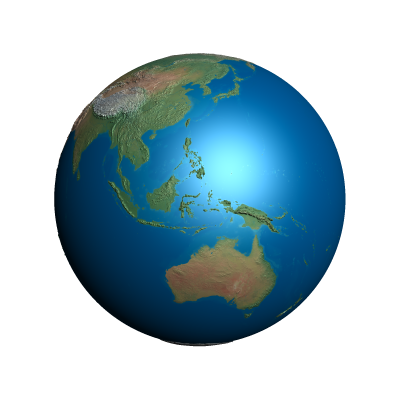

In [3]:
lv = accessvis.plot_earth(texture='relief', background="white", vertical_exaggeration=20)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia
lv.set_properties(diffuse=0.8, ambient=0.1, specular=0.35, shininess=0.03, light=[1,1,0.98]) # make pretty
lv.brightness_contrast_saturation(0.5, 0.5, 0.65)
lv.display((400,400))

## Downloading Data
If you are not running this notebook on Gadi, this code downloads an .nc file into an xarray object. Note that the file is ~0.5GB

The data is historical temperature at the surface from the NCI THREDDS server.

In [4]:
thredds_server = "https://thredds.nci.org.au/thredds/fileServer/fs38/publications/"
gadi_server = '/g/data/fs38/publications/'

#Temp at the surface
ver = "CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/"
fpath = "r10i1p1f1/day/tas/gn/latest/tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_20000101-20141231.nc"
var = 'tas'
url = f"{thredds_server}{ver}{fpath}"
gadi_path = f"{gadi_server}{ver}{fpath}"


if os.path.exists(gadi_path):
    data_file = gadi_path
else:
    print('Could not load from gadi.')
    data_file = os.path.abspath(os.path.split(url)[-1])

    if not os.path.exists(data_file):
        print(f'Downloading from {url}')
        print(f'Saving to {data_file}')
        urllib.request.urlretrieve(url, data_file)

print(f'{data_file=}')

data_file='/g/data/fs38/publications/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r10i1p1f1/day/tas/gn/latest/tas_day_ACCESS-ESM1-5_historical_r10i1p1f1_gn_20000101-20141231.nc'


## Reading the .nc file
Loading the .nc file in xarray->numpy, and taking the last datastep.

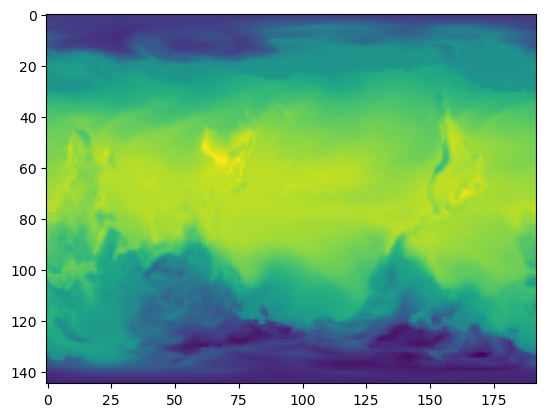

In [5]:
ds = xr.open_dataset(data_file)
data = ds[var][-1] # taking the last day's data
arr = np.array(data) # converting to numpy
plt.imshow(arr)

## Plotting
Changing the colour scheme. You can use any matplotlib compatible colour scheme.

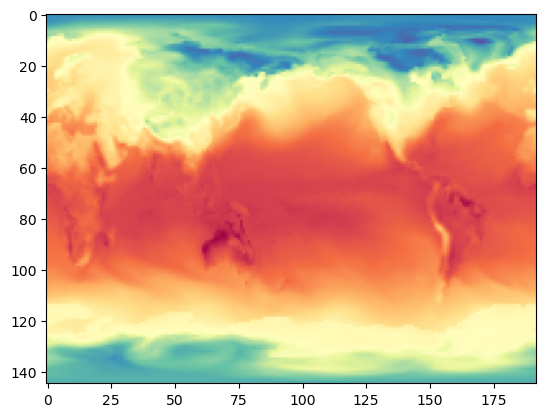

In [6]:
colours = accessvis.array_to_rgba(arr, flip=True, colourmap='Spectral_r')
plt.imshow(colours)

#### Overlaying on the Earth.

Note that we are using dataMode=0 so it plots on both land and ocean.


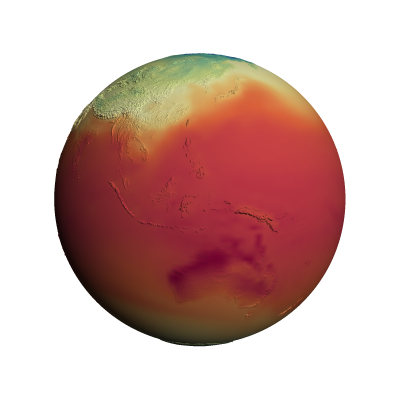

In [7]:
accessvis.update_earth_values(lv, dataMode=0, dataAlpha=1, data=colours)
lv.display((400,400))

In [8]:
lv.window()